# Load and analyze the dataset

In [1]:
from datasets import load_dataset
dataset = load_dataset("go_emotions")

print(dataset)

print(f"Training data size:{len(dataset['train'])}")
print(f"Validation data size:{len(dataset['validation'])}")
print(f"Test data size:{len(dataset['test'])}")

print(dataset['train'][0])

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})
Training data size:43410
Validation data size:5426
Test data size:5427
{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}


## Label distribution and class imbalance

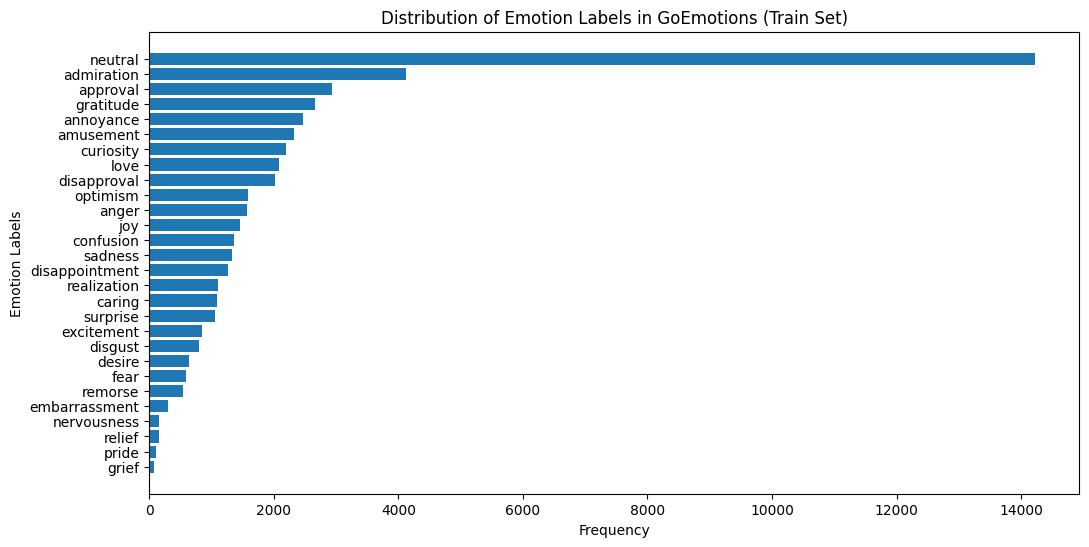

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

label_names = dataset['train'].features['labels'].feature.names

label_counts = Counter()

for x in dataset['train']:
    for label in x['labels']:
        label_counts[label] += 1

sorted_labels = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12,6))
plt.barh([label_names[i] for i, _ in sorted_labels], [count for _, count in sorted_labels])
plt.xlabel("Frequency")
plt.ylabel("Emotion Labels")
plt.title("Distribution of Emotion Labels in GoEmotions (Train Set)")
plt.gca().invert_yaxis()
plt.show()

         num_labels
count  43410.000000
mean       1.177217
std        0.417699
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000


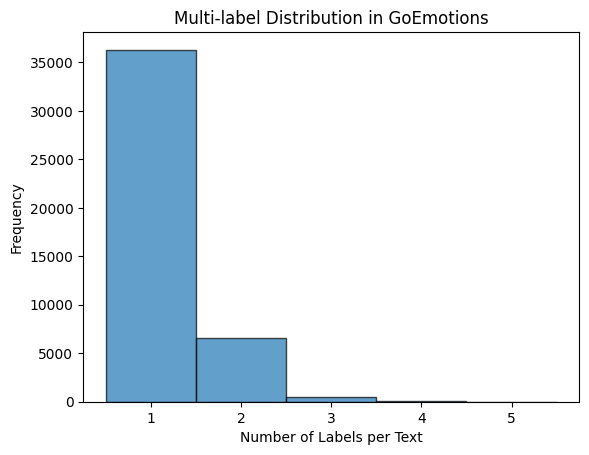

In [3]:
import pandas as pd

num_labels = [len(example["labels"]) for example in dataset['train']]
df = pd.DataFrame(num_labels, columns=["num_labels"])

print(df.describe())

plt.hist(num_labels, bins=np.arange(1, max(num_labels)+2)-0.5, edgecolor='black', alpha=0.7)
plt.xlabel("Number of Labels per Text")
plt.ylabel("Frequency")
plt.title("Multi-label Distribution in GoEmotions")
plt.xticks(range(1, max(num_labels)+1))
plt.show()

Min: 1, Max: 33, Mean: 12.840175074867542, Median: 12.0


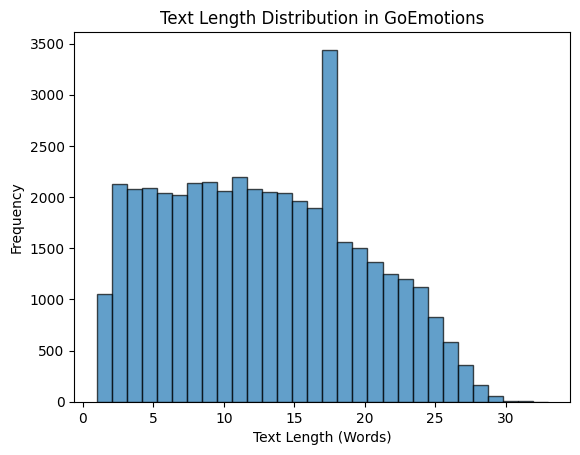

In [4]:
text_lengths = [len(example["text"].split()) for example in dataset["train"]]

print(f"Min: {np.min(text_lengths)}, Max: {np.max(text_lengths)}, Mean: {np.mean(text_lengths)}, Median: {np.median(text_lengths)}")

plt.hist(text_lengths, bins=30, alpha=0.7, edgecolor="black")
plt.xlabel("Text Length (Words)")
plt.ylabel("Frequency")
plt.title("Text Length Distribution in GoEmotions")
plt.show()

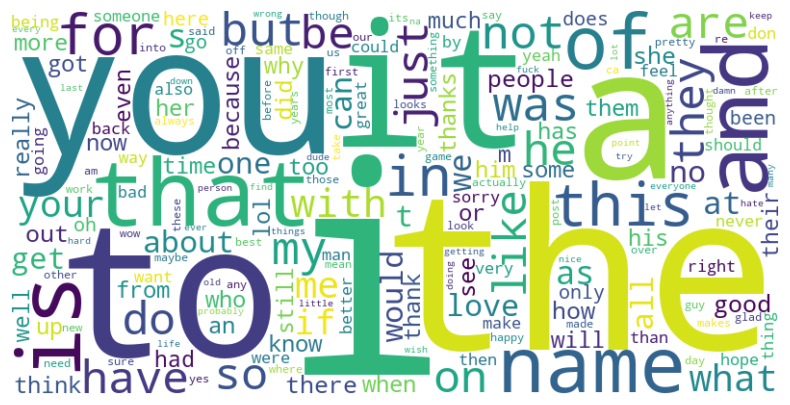

In [5]:
from wordcloud import WordCloud
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Get all text from dataset
all_text = " ".join([example["text"] for example in dataset["train"]])

# Tokenize and remove stopwords
tokens = nltk.word_tokenize(all_text)
filtered_words = [word.lower() for word in tokens if word.isalpha()]

# Use Counter to get word frequencies
word_counts = Counter(filtered_words)

# Generate word cloud using the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

# Show word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
print(sorted_labels[:5])  # Top 5 most frequent emotions
print(sorted_labels[-5:])  # Bottom 5 least frequent emotions

[(27, 14219), (0, 4130), (4, 2939), (15, 2662), (3, 2470)]
[(12, 303), (19, 164), (23, 153), (21, 111), (16, 77)]


In [7]:
label_names = dataset["train"].features["labels"].feature.names
top_5 = sorted_labels[:5]
bottom_5 = sorted_labels[-5:]

top_df = pd.DataFrame(top_5, columns=["Label Index", "Count"])
top_df["Emotion"] = top_df["Label Index"].apply(lambda x: label_names[x])
top_df["Type"] = "Top 5"

bottom_df = pd.DataFrame(bottom_5, columns=["Label Index", "Count"])
bottom_df["Emotion"] = bottom_df["Label Index"].apply(lambda x: label_names[x])
bottom_df["Type"] = "Bottom 5"

# Combine both
summary_df = pd.concat([top_df, bottom_df], ignore_index=True)

# Reorder columns for readability
summary_df = summary_df[["Type", "Emotion", "Label Index", "Count"]]

print(summary_df)

       Type        Emotion  Label Index  Count
0     Top 5        neutral           27  14219
1     Top 5     admiration            0   4130
2     Top 5       approval            4   2939
3     Top 5      gratitude           15   2662
4     Top 5      annoyance            3   2470
5  Bottom 5  embarrassment           12    303
6  Bottom 5    nervousness           19    164
7  Bottom 5         relief           23    153
8  Bottom 5          pride           21    111
9  Bottom 5          grief           16     77


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>


Total words: 554689
Total stopwords: 278085
Stopword ratio: 0.50
Top 20 most frequent words overall:
i: 20744
the: 17983
to: 12584
a: 12328
you: 11439
it: 10625
that: 9768
and: 9026
is: 8788
name: 7904
of: 7116
this: 6547
in: 5805
for: 5737
was: 4123
my: 3779
not: 3739
but: 3672
be: 3574
on: 3542

Top stopwords in the top 20 words:
i: 20744
the: 17983
to: 12584
a: 12328
you: 11439
it: 10625
that: 9768
and: 9026
is: 8788
of: 7116
this: 6547
in: 5805
for: 5737
was: 4123
my: 3779
not: 3739
but: 3672
be: 3574
on: 3542


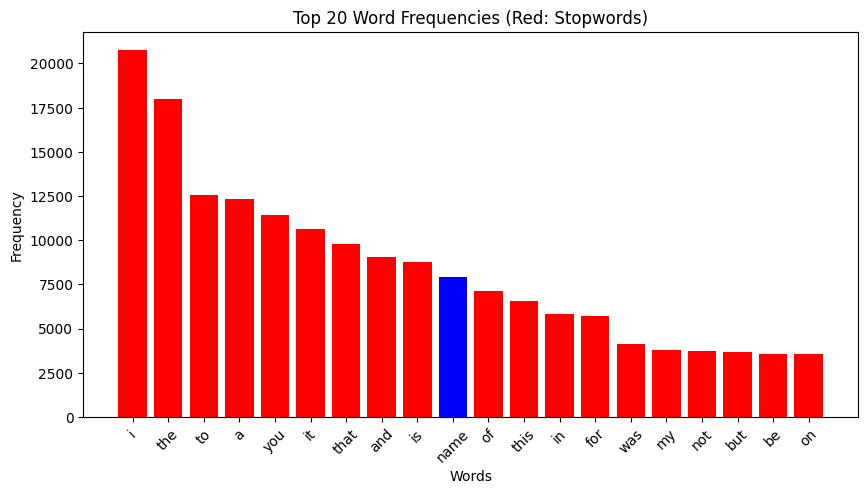

In [8]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download required resources if not already done
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words("english"))

all_words = []
for example in dataset["train"]:
    tokens = nltk.word_tokenize(example["text"])
    words = [word.lower() for word in tokens if word.isalpha()]
    all_words.extend(words)

# Create a counter for overall word frequency
word_counter = Counter(all_words)

total_words = sum(word_counter.values())

stopword_count = sum(count for word, count in word_counter.items() if word in stop_words)
stopword_ratio = stopword_count / total_words

print(f"Total words: {total_words}")
print(f"Total stopwords: {stopword_count}")
print(f"Stopword ratio: {stopword_ratio:.2f}")

# Get the top 20 most common words overall
top_20 = word_counter.most_common(20)
print("Top 20 most frequent words overall:")
for word, count in top_20:
    print(f"{word}: {count}")

# Filter out the top stopwords from the top 20 list
top_stopwords = [(word, count) for word, count in top_20 if word in stop_words]
print("\nTop stopwords in the top 20 words:")
for word, count in top_stopwords:
    print(f"{word}: {count}")

# Visualize the top 20 words, highlighting stopwords in red
words, counts = zip(*top_20)
colors = ['red' if word in stop_words else 'blue' for word in words]

plt.figure(figsize=(10,5))
plt.bar(words, counts, color=colors)
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Word Frequencies (Red: Stopwords)")
plt.show()

## Data Preprocessing

In [9]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_data(text):
    return tokenizer(text["text"], padding="max_length", truncation=True, max_length=128)

tokenize_dataset = dataset.map(tokenize_data, batched=True)
print(tokenize_dataset.column_names)

{'train': ['text', 'labels', 'id', 'input_ids', 'token_type_ids', 'attention_mask'], 'validation': ['text', 'labels', 'id', 'input_ids', 'token_type_ids', 'attention_mask'], 'test': ['text', 'labels', 'id', 'input_ids', 'token_type_ids', 'attention_mask']}


In [10]:
label_names = dataset["train"].features["labels"].feature.names

def process_labels(example):
    label_vector = [0.0] * len(label_names)
    for label in example["labels"]:
        label_vector[label] = 1.0
    example["labels"] = label_vector
    return example

processed_dataset = tokenize_dataset.map(process_labels)

In [11]:
from datasets import Sequence, Value

# Force the 'labels' column to be a sequence of float32s
processed_dataset = processed_dataset.cast_column("labels", Sequence(Value("float32")))

In [12]:
def force_tensor_types(example):
    import torch
    return {
        "input_ids": torch.tensor(example["input_ids"], dtype=torch.long),
        "attention_mask": torch.tensor(example["attention_mask"], dtype=torch.long),
        "labels": torch.tensor(example["labels"], dtype=torch.float)
    }

processed_dataset = processed_dataset.map(force_tensor_types)

In [13]:
columns = ["input_ids", "attention_mask", "labels"]

processed_dataset["train"].set_format(type="torch", columns=columns)
processed_dataset["validation"].set_format(type="torch", columns=columns)
processed_dataset["test"].set_format(type="torch", columns=columns)

train_dataset = processed_dataset["train"]
val_dataset = processed_dataset["validation"]
test_dataset = processed_dataset["test"]

In [14]:
sample = train_dataset[0]
print("input_ids dtype:", sample["input_ids"].dtype)        # should be torch.int64
print("attention_mask dtype:", sample["attention_mask"].dtype)  # should be torch.int64
print("labels dtype:", sample["labels"].dtype)              # should be torch.float32

input_ids dtype: torch.int64
attention_mask dtype: torch.int64
labels dtype: torch.float32


## Loading BERT

In [17]:
import torch
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# Number of labels (28 total: 27 emotions + neutral)
num_labels = len(label_names)

# Load BERT for multi-label classification
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=num_labels,
    problem_type="multi_label_classification"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
import numpy as np
import torch
from sklearn.metrics import f1_score, accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred

    # Convert logits to probabilities
    probs = torch.sigmoid(torch.tensor(logits))

    # Binarize predictions at 0.5
    preds = (probs > 0.5).int().numpy()
    labels = torch.tensor(labels).int().numpy()

    # Micro F1 score
    f1_micro = f1_score(labels, preds, average="micro")
    subset_acc = np.mean(np.all(preds == labels, axis=1))

    return {
        "f1_micro": f1_micro,
        "subset_accuracy": subset_acc
    }

In [19]:
# Define hyperparameters & logging
training_args = TrainingArguments(
    output_dir="../results",          # Where to save model checkpoints
    evaluation_strategy="epoch",     # Evaluate each epoch
    save_strategy="epoch",           # Save model each epoch
    num_train_epochs=3,              # You can tune this
    per_device_train_batch_size=16,  # Adjust based on GPU memory
    per_device_eval_batch_size=16,
    learning_rate=2e-5,             # Typical fine-tuning LR for BERT
    weight_decay=0.01,              # Regularization
    logging_steps=100,              # Log every 100 steps
    load_best_model_at_end=True,     # Useful if you want the best model
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,   # from your processed_dataset
    eval_dataset=val_dataset,      # from your processed_dataset
    compute_metrics=compute_metrics
)

/Users/sanshritbakshi/PycharmProjects/Sanshrit.Bakshi.HW3/.venv1/lib/python3.10/site-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [25]:
# Train the model
trainer.train()

# Evaluate on validation set
val_metrics = trainer.evaluate()
print("Validation metrics:", val_metrics)

# Evaluate on test set
test_metrics = trainer.evaluate(test_dataset)
print("Test metrics:", test_metrics)

RuntimeError: result type Float can't be cast to the desired output type Long

In [20]:
small_train = train_dataset.select(range(2000))
small_val = val_dataset.select(range(500))

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train,
    eval_dataset=small_val,
    compute_metrics=compute_metrics
)

trainer.train()

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [43]:
val_metrics = trainer.evaluate()
print("Validation metrics:", val_metrics)

test_metrics = trainer.evaluate(test_dataset)
print("Test metrics:", test_metrics)

Validation metrics: {'eval_loss': 0.13301019370555878, 'eval_f1_micro': 0.31778058007566207, 'eval_subset_accuracy': 0.216, 'eval_runtime': 4.0604, 'eval_samples_per_second': 123.141, 'eval_steps_per_second': 7.881, 'epoch': 3.0}
Test metrics: {'eval_loss': 0.1266833245754242, 'eval_f1_micro': 0.35392596085828815, 'eval_subset_accuracy': 0.24064860880781277, 'eval_runtime': 43.8784, 'eval_samples_per_second': 123.683, 'eval_steps_per_second': 7.749, 'epoch': 3.0}


In [19]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

# DistlBERT

In [1]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

/Users/sanshritbakshi/PycharmProjects/Sanshrit.Bakshi.HW3/.venv1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
from transformers import DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=num_labels,
    problem_type="multi_label_classification"
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
from transformers import AutoTokenizer, DistilBertForSequenceClassification, TrainingArguments, Trainer

# Load DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Prepare your tokenization function and process the dataset (your existing code remains the same)
# ...

# Load DistilBERT model for multi-label classification
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=num_labels,  # Should be defined from your dataset (e.g., 28)
    problem_type="multi_label_classification"
)

# Configure training arguments (as before)
training_args = TrainingArguments(
    output_dir="../results",
    evaluation_strategy="epoch",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
)

# Initialize Trainer (using your processed datasets)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Now train your model
trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/sanshritbakshi/PycharmProjects/Sanshrit.Bakshi.HW3/.venv1/lib/python3.10/site-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1 Micro,Subset Accuracy
1,0.094700,0.088622,0.543027,0.421489
2,0.081000,0.083664,0.563415,0.441578
3,0.071500,0.083698,0.574672,0.459270


TrainOutput(global_step=8142, training_loss=0.09295687140190932, metrics={'train_runtime': 2097.6407, 'train_samples_per_second': 62.084, 'train_steps_per_second': 3.882, 'total_flos': 4314807064442880.0, 'train_loss': 0.09295687140190932, 'epoch': 3.0})

In [24]:
def predict_emotions(text, threshold=0.5):
    """
    Predict emotions for a given input text.

    Args:
        text (str): The input text to analyze.
        threshold (float): The probability threshold to decide if an emotion is present.

    Returns:
        predicted_emotions (list): List of emotion names predicted for the input text.
        probs (ndarray): Array of probability scores for each emotion.
    """
    # Ensure the model is in evaluation mode
    model.eval()

    # Tokenize the input text with same parameters used during training
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=128
    )

    # Move input tensors to the correct device (CPU/GPU/MPS)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Perform a forward pass without gradient calculation
    with torch.no_grad():
        outputs = model(**inputs)
        # Outputs logits from the model's classification head
        logits = outputs.logits

        # Apply sigmoid activation to convert logits to probabilities
        probs = torch.sigmoid(logits)[0].cpu().numpy()

    # Select labels where the probability exceeds the threshold
    predicted_emotions = [label_names[i] for i, prob in enumerate(probs) if prob > threshold]

    return predicted_emotions, probs

# Example usage:
text_input = "I have no idea what to do with my life"
emotions, probabilities = predict_emotions(text_input, threshold=0.3)  # You may adjust threshold

print("Input text:", text_input)
print("Predicted Emotions:", emotions)
print("Raw Probabilities:", probabilities)

Input text: I have no idea what to do with my life
Predicted Emotions: ['confusion']
Raw Probabilities: [0.00432509 0.00305156 0.00951472 0.01974642 0.01165979 0.0063215
 0.7957088  0.08827927 0.00687335 0.0369913  0.05122997 0.00313767
 0.00705877 0.00273661 0.00974476 0.00520815 0.00246242 0.00299324
 0.00453255 0.00658694 0.01768175 0.00122337 0.04010813 0.00185251
 0.0071487  0.01900382 0.01076989 0.1214045 ]


In [22]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [30]:
# Save the model and tokenizer to a directory (e.g., "./my_saved_model")
model.save_pretrained("./BERT_Trained")
tokenizer.save_pretrained("./BERT_Trained")

('./BERT_Trained/tokenizer_config.json',
 './BERT_Trained/special_tokens_map.json',
 './BERT_Trained/vocab.txt',
 './BERT_Trained/added_tokens.json',
 './BERT_Trained/tokenizer.json')

### Loading BERT locally

In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Replace 'path/to/my_saved_model' with the correct path
model_path = "/Users/sanshritbakshi/Documents/GitHub/MultiLabel-Emotion-Classification/models/BERT_Trained"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Set device (if you have a GPU or use CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [16]:
from transformers import TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    # Apply sigmoid to get probabilities
    probs = torch.sigmoid(torch.tensor(logits))
    # Binarize the predictions (you can adjust the threshold if needed)
    predictions = (probs > 0.5).int().numpy()
    labels = torch.tensor(labels).int().numpy()
    # Compute micro F1 and subset accuracy
    f1_micro = f1_score(labels, predictions, average="micro")
    subset_accuracy = np.mean(np.all(predictions == labels, axis=1))
    return {"f1_micro": f1_micro, "subset_accuracy": subset_accuracy}

training_args = TrainingArguments(
    output_dir="./results",
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
)

trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Evaluate the test set
test_metrics = trainer.evaluate()
print("Test metrics:", test_metrics)

/Users/sanshritbakshi/PycharmProjects/Sanshrit.Bakshi.HW3/.venv1/lib/python3.10/site-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Test metrics: {'eval_loss': 0.08537615835666656, 'eval_model_preparation_time': 0.0011, 'eval_f1_micro': 0.5727094424208462, 'eval_subset_accuracy': 0.4588170259812051, 'eval_runtime': 44.1281, 'eval_samples_per_second': 122.983, 'eval_steps_per_second': 7.705}


## Saving Baseline Results

In [17]:
import pandas as pd

# You can also add any hyperparameter details you want to record
baseline_results = test_metrics.copy()  # Copy the dictionary so we can add more info
baseline_results["num_train_epochs"] = training_args.num_train_epochs
baseline_results["per_device_train_batch_size"] = training_args.per_device_train_batch_size
baseline_results["learning_rate"] = training_args.learning_rate

# Convert the dictionary into a DataFrame (list with one dict)
baseline_df = pd.DataFrame([baseline_results])

# Save the DataFrame to a CSV file
baseline_df.to_csv("baseline_results.csv", index=False)

print("Baseline metrics saved to baseline_results.csv")

Baseline metrics saved to baseline_results.csv


In [21]:
from sklearn.metrics import classification_report
import numpy as np
import torch

def compute_classification_report(dataset, model, tokenizer, threshold=0.5):
    model.eval()
    all_preds = []
    all_labels = []

    for batch in dataset:
            input_ids = batch["input_ids"].unsqueeze(0).to(device)
        attention_mask = batch["attention_mask"].unsqueeze(0).to(device)
        labels = torch.tensor(batch["labels"]).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = (torch.sigmoid(logits) > threshold).int()

        all_preds.append(preds.cpu().numpy()[0])
        all_labels.append(labels.cpu().numpy()[0])

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    print(classification_report(all_labels, all_preds, target_names=label_names,zero_division=0))

# Example usage on a subset of the test dataset:
# You might want to iterate over a subset if the test set is large.
compute_classification_report(test_dataset.select(range(1000)), model, tokenizer, threshold=0.5)

/var/folders/xk/v43z00vn3mj3lb_2ryh_5wxm0000gn/T/ipykernel_7829/2745600742.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch["labels"]).unsqueeze(0).to(device)


                precision    recall  f1-score   support

    admiration       0.70      0.65      0.67        82
     amusement       0.83      0.88      0.85        43
         anger       0.51      0.46      0.49        39
     annoyance       1.00      0.02      0.03        58
      approval       0.62      0.30      0.41        50
        caring       0.80      0.24      0.37        33
     confusion       0.71      0.40      0.51        25
     curiosity       0.69      0.45      0.55        44
        desire       0.50      0.27      0.35        22
disappointment       0.00      0.00      0.00        19
   disapproval       0.64      0.40      0.49        52
       disgust       0.67      0.30      0.41        27
 embarrassment       0.00      0.00      0.00         8
    excitement       0.80      0.25      0.38        16
          fear       0.67      0.67      0.67        21
     gratitude       0.96      0.91      0.93        76
         grief       0.00      0.00      0.00  

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Replace 'path/to/my_saved_model' with the correct path
model_path = "/Users/sanshritbakshi/Desktop/CS6120/Project/BERT_ClassBalance"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Set device (if you have a GPU or use CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

from transformers import TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    # Apply sigmoid to get probabilities
    probs = torch.sigmoid(torch.tensor(logits))
    # Binarize the predictions (you can adjust the threshold if needed)
    predictions = (probs > 0.5).int().numpy()
    labels = torch.tensor(labels).int().numpy()
    # Compute micro F1 and subset accuracy
    f1_micro = f1_score(labels, predictions, average="micro")
    subset_accuracy = np.mean(np.all(predictions == labels, axis=1))
    return {"f1_micro": f1_micro, "subset_accuracy": subset_accuracy}

training_args = TrainingArguments(
    output_dir="./results",
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
)

trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Evaluate the test set
test_metrics = trainer.evaluate()
print("Test metrics:", test_metrics)

/Users/sanshritbakshi/PycharmProjects/Sanshrit.Bakshi.HW3/.venv1/lib/python3.10/site-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Test metrics: {'eval_loss': 0.21259403228759766, 'eval_model_preparation_time': 0.0012, 'eval_f1_micro': 0.45267342654218967, 'eval_subset_accuracy': 0.1396720103187765, 'eval_runtime': 42.9493, 'eval_samples_per_second': 126.358, 'eval_steps_per_second': 7.916}


## Push model to HuggingFace
-  use the command - "huggingface-cli login"
- input the API token key (create a write token from huggingFace)
- Create a repo for model
- load the model from local file or use trained model

In [20]:
# Push the model
model.push_to_hub("BERT_ClassBalanced", commit_message="Initial model upload")

# Push the tokenizer
tokenizer.push_to_hub("BERT_ClassBalanced", commit_message="Initial tokenizer upload")

README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/BakshiSan/BERT_ClassBalanced/commit/c68b1207eb7a7309c8067ea2e058cc4a282dec24', commit_message='Initial tokenizer upload', commit_description='', oid='c68b1207eb7a7309c8067ea2e058cc4a282dec24', pr_url=None, repo_url=RepoUrl('https://huggingface.co/BakshiSan/BERT_ClassBalanced', endpoint='https://huggingface.co', repo_type='model', repo_id='BakshiSan/BERT_ClassBalanced'), pr_revision=None, pr_num=None)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
#
model_repo = "BakshiSan/BERT"  # Ensure this is the correct repo identifier

print("Downloading tokenizer...")
tokenizer = AutoTokenizer.from_pretrained(model_repo)
print("Tokenizer downloaded.")
#
print("Downloading model...")
model = AutoModelForSequenceClassification.from_pretrained(model_repo)
print("Model downloaded.")
#
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("Model moved to device:", device)

def predict_emotions(text, threshold=0.5):
    model.eval()  # Set model to evaluation mode
    # Tokenize the text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.sigmoid(logits)[0].cpu().numpy()

    # Assuming label_names was saved or is known by the team:
    # For example, if your model was originally trained on the GoEmotions dataset:
    label_names = [...]  # List of emotion names in order.

    # Get predicted emotions that exceed the threshold
    predicted_emotions = [label_names[i] for i, prob in enumerate(probs) if prob > threshold]

    return predicted_emotions, probs


# Example usage:
text_input = "I’m excited about the upcoming project!"
emotions, probabilities = predict_emotions(text_input)
print("Predicted Emotions:", emotions)


def predict_emotions(text, threshold=0.5):
    """
    Predict emotions for a given input text.

    Args:
        text (str): The input text to analyze.
        threshold (float): The probability threshold to decide if an emotion is present.

    Returns:
        predicted_emotions (list): List of emotion names predicted for the input text.
        probs (ndarray): Array of probability scores for each emotion.
    """
    # Ensure the model is in evaluation mode
    model.eval()

    # Tokenize the input text with same parameters used during training
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=128
    )

    # Move input tensors to the correct device (CPU/GPU/MPS)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Perform a forward pass without gradient calculation
    with torch.no_grad():
        outputs = model(**inputs)
        # Outputs logits from the model's classification head
        logits = outputs.logits

        # Apply sigmoid activation to convert logits to probabilities
        probs = torch.sigmoid(logits)[0].cpu().numpy()

    # Select labels where the probability exceeds the threshold
    predicted_emotions = [label_names[i] for i, prob in enumerate(probs) if prob > threshold]

    return predicted_emotions, probs

# Example usage:
text_input = "I am a CS student with no job"
emotions, probabilities = predict_emotions(text_input, threshold=0.3)  # You may adjust threshold

print("Input text:", text_input)
print("Predicted Emotions:", emotions)
print("Raw Probabilities:", probabilities)